Total number of remaining features:
41
List of selected features via Lasso dimenssion reduction:
['F0', 'F1', 'F3', 'F21', 'F22', 'F23', 'F24', 'F59', 'F67', 'F88', 'F90', 'F137', 'F140', 'F159', 'F160', 'F161', 'F162', 'F188', 'F296', 'F297', 'F363', 'F418', 'F419', 'F423', 'F433', 'F468', 'F480', 'F482', 'F483', 'F484', 'F485', 'F486', 'F488', 'F489', 'F499', 'F500', 'F510', 'F511', 'F521', 'F572', 'F589']


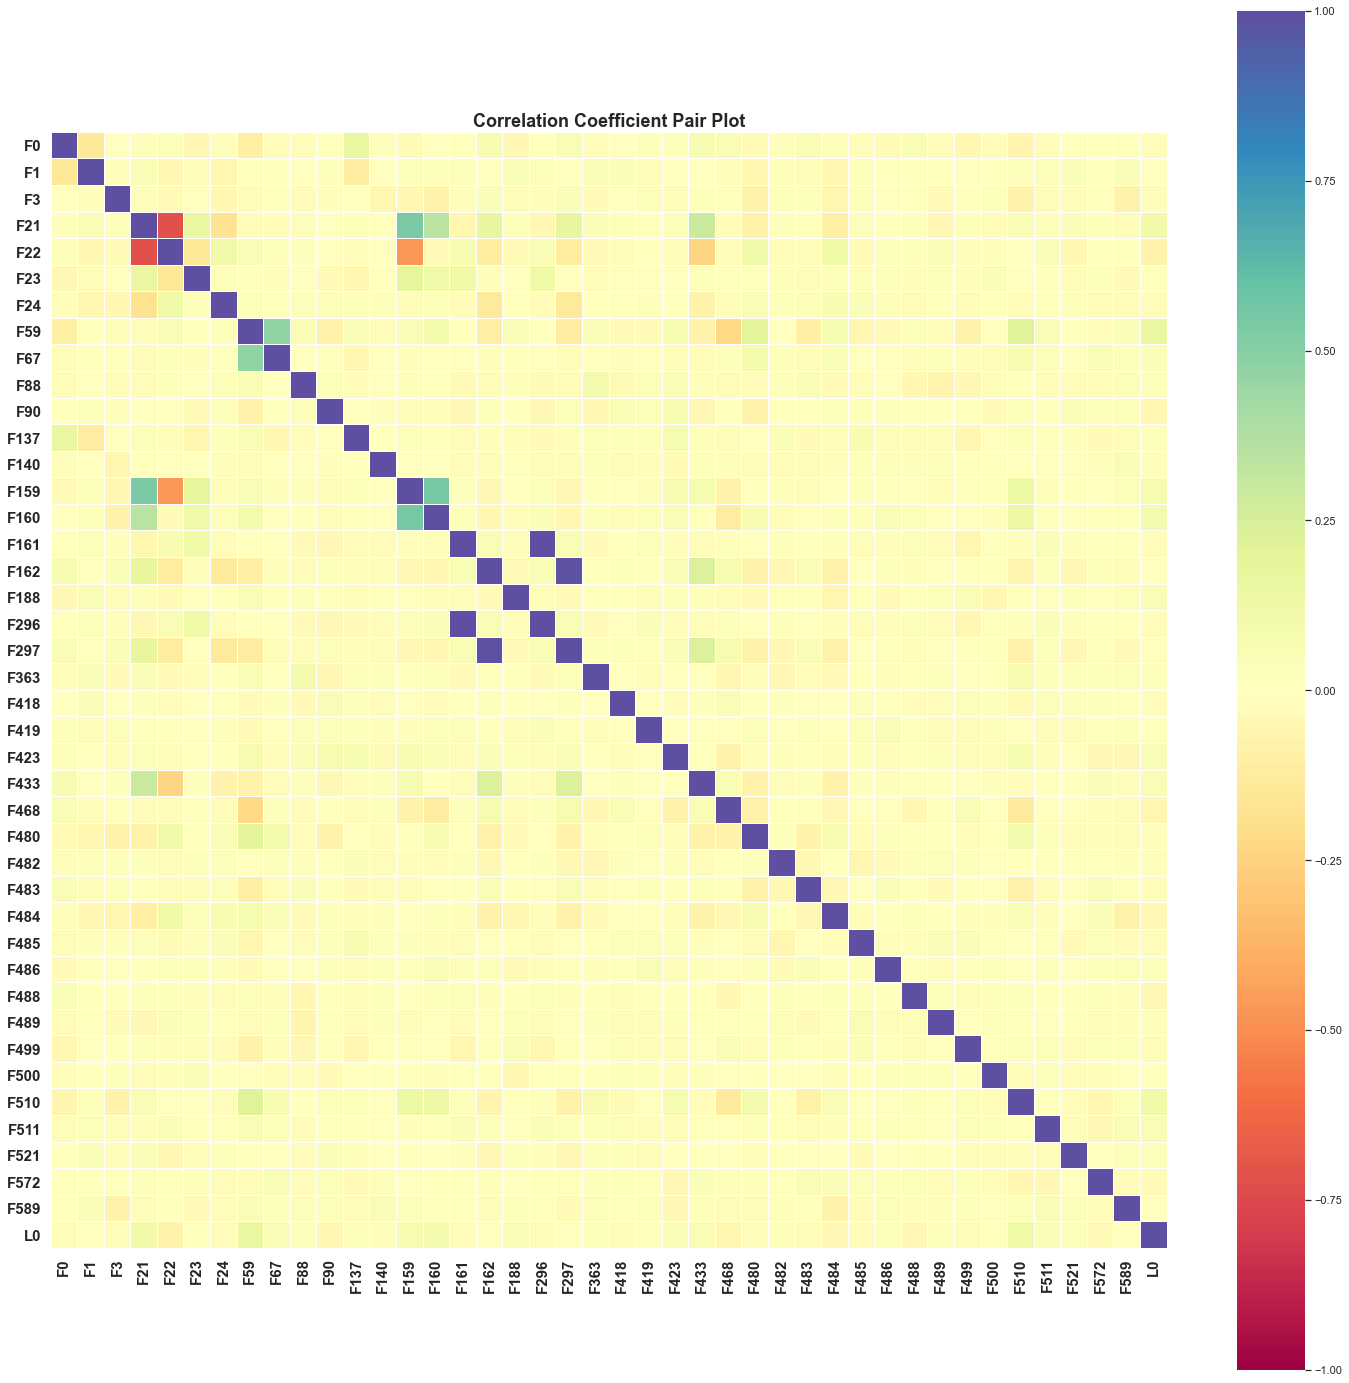

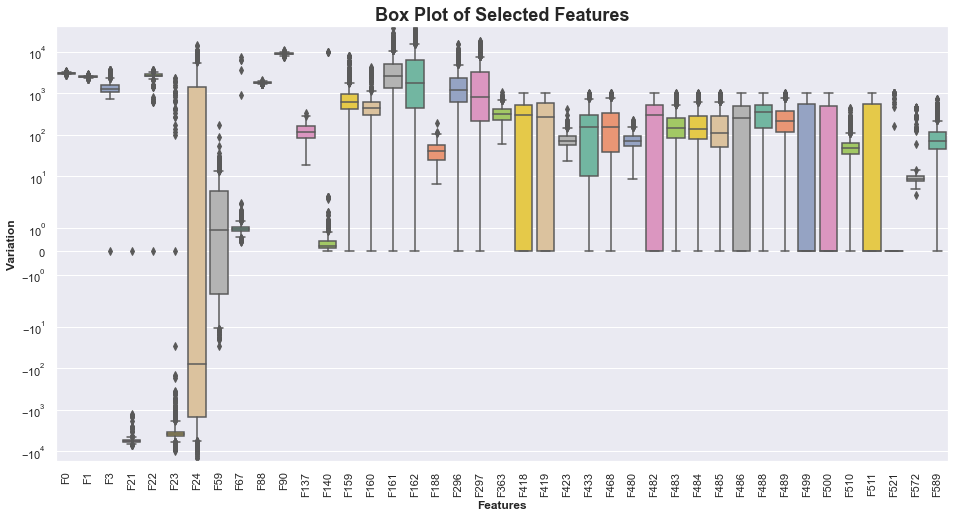

Higher fail ratio: 0.069
Lower fail ration: 0.025
Ratio difference: 0.044


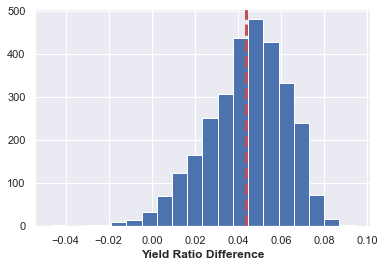

Mean ratio decrease: 0.044
95% Confidence interval: [0.00354751 0.07402423]
P-value: 0.5416666666666666


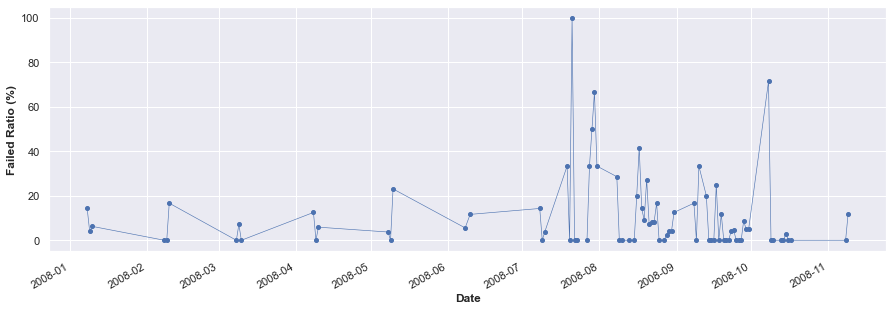

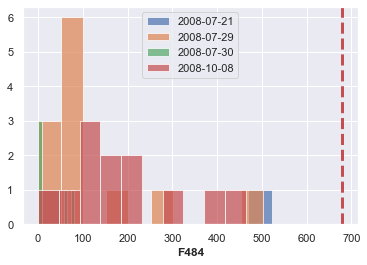

In [45]:
# Import libraries and Packages   1111
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

%matplotlib inline

###########################################################

# Loading Data-Set
label = pd.read_csv("secom_labels.txt", delim_whitespace=True, header=None)
features = pd.read_csv("secom_data.txt", delim_whitespace=True,header=None)

features = features.rename(columns={features.columns[i]: 'F'+ str(i) for i in range (590)}) # adding name to feature columns
label = label.rename(columns={0: 'L0', 1 :'date'})   # adding name to label column

############################################################

# Concatinating to separate files
df = pd.concat([features,label],axis=1, ignore_index=False)
#print(df.head()) # Preliminary inspection of data-set
#print(df.shape) # Preliminary inspection of data-set
#print(df.index) # Preliminary inspection of data-set

# Dropping columns with more than 10% missing data
df = df.dropna(thresh=len(df) - int(0.1 * len(df)), axis=1)
df = df.fillna(df.median())
df.L0.replace(-1,0, inplace=True) # Converting label column to binary [0,1]

# Building label vectore (y) and feature matrix(X)
y = df['L0']
X = df.drop(['L0','date'], axis=1)










# Import libraries and Packages    2222
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

%matplotlib inline

###########################################################

# Loading Data-Set
label = pd.read_csv("secom_labels.txt", delim_whitespace=True, header=None)
features = pd.read_csv("secom_data.txt", delim_whitespace=True,header=None)

features = features.rename(columns={features.columns[i]: 'F'+ str(i) for i in range (590)}) # adding name to feature columns
label = label.rename(columns={0: 'L0', 1 :'date'})   # adding name to label column

############################################################

# Concatinating to separate files
df = pd.concat([features,label],axis=1, ignore_index=False)
#print(df.head()) # Preliminary inspection of data-set
#print(df.shape) # Preliminary inspection of data-set
#print(df.index) # Preliminary inspection of data-set

# Dropping columns with more than 10% missing data
df = df.dropna(thresh=len(df) - int(0.1 * len(df)), axis=1)
df = df.fillna(df.median())
df.L0.replace(-1,0, inplace=True) # Converting label column to binary [0,1]

# Building label vectore (y) and feature matrix(X)
y = df['L0']
X = df.drop(['L0','date'], axis=1)






# Employing Lasso regularization approach to reduce feature matrix dimenssion
lasso = Lasso(alpha=0.2,normalize=False)
lasso_coef = lasso.fit(X, y).coef_
print('Total number of remaining features:')
print(len(lasso_coef[lasso_coef!=0.0]))

# Making a list from selected features
val = lasso_coef[lasso_coef!=0.0]
key, = np.where(lasso_coef!=0.0)
feature_list = X.columns[key]
val_plt = np.multiply(val,1000)
feature_list = feature_list.tolist()
feature_column = key.tolist()
val = val.tolist()
print('List of selected features via Lasso dimenssion reduction:')
print(feature_list)

# revising feature matrix based on LASSO features reduction
X = X[feature_list]






# Making correlation coefficients pair plot of all feature in order to identify degenrate features   333333
plt.figure(figsize=(25,25))
df1 = pd.concat([X,y],axis=1, ignore_index=False) 
ax = plt.axes()
corr = df1.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=False, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
plt.xticks(rotation=90,fontweight="bold", size=15) 
plt.yticks(rotation=0,fontweight="bold", size=15) 
plt.title('Correlation Coefficient Pair Plot', fontweight="bold", size=18)
plt.savefig('pcp.png')
plt.show()




# Making box plot to explore features variations and outliers
plt.figure(figsize=(16,8))
sns.set()
sns.boxplot(data=X, orient="v", palette="Set2")
plt.xlabel('Features',fontweight="bold", size=12)
plt.ylabel('Variation',fontweight="bold", size=12)
plt.title('Box Plot of Selected Features', fontweight="bold", size=18)
plt.yscale('symlog', nonposy='clip')
plt.xticks(rotation=90)
plt.savefig('BoxPlot.png');plt.show()


# Exploratory Data Analysis
# Plotting total products against failed product in histogram format  
bins = 30
for feature in feature_list:
    tf = feature
    plt.figure()
    plt.hist(df1[tf], bins = bins, color='m',label = 'Total',alpha=0.5)
    plt.hist(df1[tf][df1['L0'] == 1], bins = bins, color='b',label = 'Fail')

    plt.xlabel(tf);plt.ylabel('Production')
    plt.title('Feature ID:'+tf,fontweight="bold", size=12)
    plt.yscale('log')

    plt.legend();plt.savefig(tf+'.png');
    plt.close();




# Statistical Analysis & Hypothesis Testing    444444
num_replica = 3000
bs_replica = np.empty(num_replica)
ht_feature = 'F484'
threshold = 680

lower_range = df1[(df1[ht_feature]>threshold) ]
higher_range = df1[(df1[ht_feature]<=threshold)]

lower_range_ratio = len(lower_range[lower_range['L0'] == 1])/len(lower_range)
higher_range_ratio = len(higher_range[higher_range['L0'] == 1])/len(higher_range)
ratio_diff = higher_range_ratio-lower_range_ratio

print('Higher fail ratio:',"%.3f" % higher_range_ratio)
print('Lower fail ration:',"%.3f" % lower_range_ratio)
print('Ratio difference:', "%.3f" % ratio_diff)

# Bootstrapping
for i in range(num_replica):
    lr_bs = lower_range.sample(frac=1,replace=True)
    hr_bs = higher_range.sample(frac=1,replace=True)
    
    lr_bs_r = len(lr_bs[lr_bs['L0'] == 1])/len(lr_bs)
    hr_bs_r = len(hr_bs[hr_bs['L0'] == 1])/len(hr_bs)
    ratio_diff_bs = hr_bs_r - lr_bs_r
    bs_replica[i] = ratio_diff_bs  


# Histogram plot    
plt.hist(bs_replica, bins=20)
plt.axvline(ratio_diff, color='r', linestyle='dashed', linewidth=3)
plt.xlabel('Yield Ratio Difference',fontweight="bold", size=12)
plt.savefig('Hypothesis.png');
plt.show()   

# Calculating P-value
print('Mean ratio decrease:',"%.3f" % np.mean(bs_replica))
print('95% Confidence interval:', (np.percentile(bs_replica,[2.5,97.5])))
print('P-value:', np.sum(bs_replica > (ratio_diff))/num_replica)







# Preparing data for time series analysis    5555
# Concatinating two separate files
df2 = pd.concat([features,label],axis=1, ignore_index=False)

# Converting to time series format
df2.date = pd.to_datetime(df2.date)
df2.set_index('date', inplace=True)


# Resampling yield data based on daily information 
failed_product = df2.L0[df2['L0']==1].resample('D').count()
total_product = df2.L0[df2['L0']==-1].resample('D').count()

failed_ratio = failed_product * 100 / total_product
failed_ratio = failed_ratio.dropna()

# Visualizaion of daily production failed ratio
sns.set()

failed_ratio.plot(style='bo-',MarkerSize=4, LineWidth = 0.6, figsize=(15,5))

plt.xlabel('Date', fontweight="bold", size=12)
plt.ylabel('Failed Ratio (%)', fontweight="bold", size=12)
plt.grid(True);plt.savefig('100Days.png')
plt.show()



# Indexing dates with more than 50% failed ratio
date_index = failed_ratio[failed_ratio >= 50]

# Plotting F484 for date_index
df2['F484'].loc['2008-07-21'].hist(alpha=0.7, label = '2008-07-21')
df2['F484'].loc['2008-07-29'].hist(alpha=0.7, label = '2008-07-29')
df2['F484'].loc['2008-07-30'].hist(alpha=0.7, label = '2008-07-30')
df2['F484'].loc['2008-10-08'].hist(alpha=0.7, label = '2008-10-08')
plt.axvline(680, color='r', linestyle='dashed', linewidth=3) # Thresold in hypothesis testing (Previouse section)
plt.xlabel('F484', fontweight="bold", size=12)
plt.legend()
plt.savefig('F484_Worst.png')
plt.show()


In [46]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [48]:
import imblearn; imblearn.show_versions(github=True)


<details><summary>System, Dependency Information</summary>

**System Information**

* python    : `3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]`
* executable: `c:\Anaconda3\python.exe`
* machine   : `Windows-10-10.0.19041-SP0`

**Python Dependencies**

* pip       : `21.2.2`
* setuptools: `50.3.1.post20201107`
* imblearn  : `0.9.1`
* sklearn   : `1.1.1`
* numpy     : `1.19.2`
* scipy     : `1.5.2`
* Cython    : `0.29.21`
* pandas    : `1.1.3`
* keras     : `2.4.3`
* tensorflow: `2.4.0`
* joblib    : `1.1.0`

</details>


In [56]:


#########################################################
# Claculating default Ratio    66666
passed = len(df[df['L0']==0])
failed = len(df[df['L0']==1])
ratio = float(failed/(passed+failed))
print('Number of passed sample:', passed)
print('Number of failed sample:', failed)
print('Default Ratio (failed/total) :', "%.3f" % ratio)

#########################################################
# Splitting data to train and test sets



X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
X_test = X_test.values # Coverting dataframe to matrix for compatibility purpose

# Under-sampling of overer-represented calss (pass) 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_us, y_us = rus.fit_resample(X_train, y_train)

print('########################################')
print('Size of training data-set:', X_train.shape)
print('Size of under sampling data_set:', X_us.shape)

# Over-sampling of under-represented calss (fail)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_os, y_os = ros.fit_resample(X_train, y_train)
print('Size of overer sampling data_set:', X_os.shape)

Number of passed sample: 1463
Number of failed sample: 104
Default Ratio (failed/total) : 0.066
########################################
Size of training data-set: (1096, 41)
Size of under sampling data_set: (146, 41)
Size of overer sampling data_set: (2046, 41)



Model Report on Training Set
Accuracy : 0.9599
AUC Score (Train): 0.994617


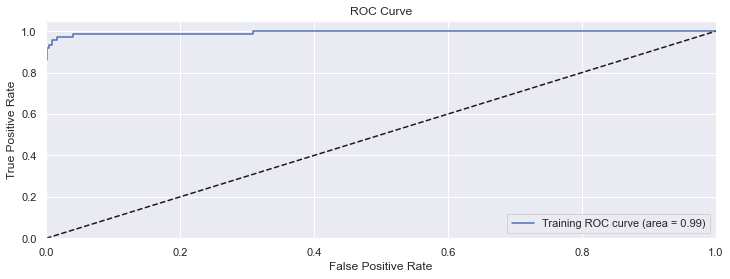

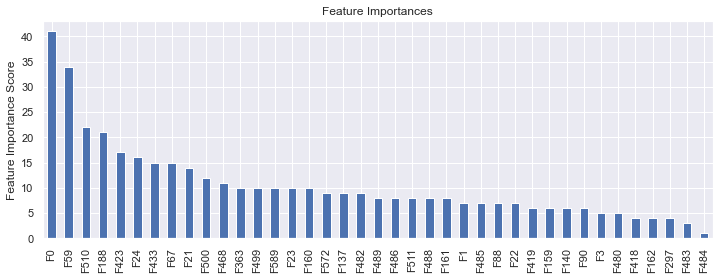

In [73]:
# Import ML Libraries 77777

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  #Additional scklearn functions
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import classification_report
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 12, 4




# XGB Model

def xgb_model(alg, X_matrix, y_vector, test_matrix, test_vector, useTrainCV=True, useTestSet = False, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_matrix, y_vector)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_matrix, y_vector, eval_metric='auc')   
    
    #Predict training set:
    dtrain_predictions = alg.predict(X_matrix)
    dtrain_predprob = alg.predict_proba(X_matrix)[:,1]
    #Print model report:
    print ("\nModel Report on Training Set")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y_vector, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_vector, dtrain_predprob))
    # Determine the false positive and true positive rates
    fpr_train, tpr_train, _ = roc_curve(y_vector, dtrain_predprob)
    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr_train, tpr_train, label='Training ROC curve (area = %0.2f)' % metrics.roc_auc_score(y_vector, dtrain_predprob))
       
    ############################################################    
    if useTestSet:   
        #Predict test set:
        dtest_predictions = alg.predict(test_matrix)
        dtest_predprob = alg.predict_proba(test_matrix)[:,1] 
        #Print model report:
        print ("\nModel Report on Test Set")
        print ("Accuracy : %.4g" % metrics.accuracy_score(test_vector, dtest_predictions))
        print ("AUC Score (Test): %f" % metrics.roc_auc_score(test_vector, dtest_predprob))               
        # Determine the false positive and true positive rates
        fpr_test, tpr_test, _ = roc_curve(test_vector, dtest_predprob) 
        # Plot of a ROC curve for a specific class
        plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % metrics.roc_auc_score(test_vector, dtest_predprob))
              
    ############################################################    
    plt.plot([0, 1], [0, 1], 'k--'); plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05]);
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curve')
    plt.legend(loc="lower right"); plt.savefig('ROC.png'); plt.show()

    
    ############################################################
    # Calculating feature importance
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.savefig('Feature_Importance.png'); plt.show()    







    # First run with default model parameters 

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 reg_lambda=1,     
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_model(xgb1, X_train, y_train, X_test, y_test)


In [83]:
# Tunning max_depth & min_child_weight (Part I)


param_test1 = {
 'max_depth':np.arange(3,10,2),
 'min_child_weight':np.arange(1,10,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, reg_lambda=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=1, cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[22:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'mean_fit_time': array([0.24554257, 0.2327764 , 0.20225906, 0.1505971 , 0.14780269,
         0.27905321, 0.23497128, 0.21921368, 0.16037083, 0.14301753,
         0.30358734, 0.27227111, 0.19208546, 0.18729868, 0.14561009,
         0.26688662, 0.21482549, 0.17812271, 0.1651576 , 0.13763161]),
  'std_fit_time': array([0.05667519, 0.06398676, 0.03607804, 0.01040265, 0.02091584,
         0.05454369, 0.06088672, 0.05768462, 0.00569081, 0.00791858,
         0.09930474, 0.03462846, 0.01679059, 0.01535237, 0.0135726 ,
         0.01477391, 0.0137272 , 0.00645074, 0.01770263, 0.00819956]),
  'mean_score_time': array([0.00379043, 0.00379033, 0.00418844, 0.00319157, 0.00299239,
         0.00359082, 0.00319176, 0.00299187, 0.00259304, 0.00359049,
         0.00379024, 0.0035902 , 0.0033917 , 0.00299187, 0.00299273,
         0.00319061, 0.00319142, 0.0033915 , 0.00319214, 0.00339117]),
  'std_score_time': array([9.77486277e-04, 1.16326826e-03, 1.93379682e-03, 3.99065516e-04,
         1.09314620e-03

In [85]:
# Tunning max_depth & min_child_weight (Part II)
param_test2 = {
 'max_depth':[6,7,8]
 }
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=200, max_depth=7,
 min_child_weight=9, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=0, reg_lambda=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=1, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

[22:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'mean_fit_time': array([0.19348135, 0.18669963, 0.17453151]),
  'std_fit_time': array([0.04900898, 0.02210742, 0.01751179]),
  'mean_score_time': array([0.00498734, 0.00438933, 0.00299397]),
  'std_score_time': array([0.00274974, 0.00162113, 0.00154884]),
  'param_max_depth': masked_array(data=[6, 7, 8],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}],
  'split0_test_score': array([0.63186992, 0.63186992, 0.63186992]),
  'split1_test_score': array([0.62508711, 0.62508711, 0.62508711]),
  'split2_test_score': array([0.7261324, 0.7261324, 0.7261324]),
  'split3_test_score': array([0.67222222, 0.67222222, 0.67222222]),
  'split4_test_score': array([0.75098039, 0.75098039, 0.75098039]),
  'mean_test_score': array([0.68125841, 0.68125841, 0.68125841]),
  'std_test_score': array([0.05010174, 0.05010174, 0.05010174]),
  'rank_test_score': array([1, 1, 1])},
 {'max_depth': 6},


In [86]:
# Tunning max_depth & min_child_weight (Part III)
param_test3 = {
 'min_child_weight':[8,9,10,11,12,13,14,15,16]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=200, max_depth=6,
 min_child_weight=9, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=1, cv=5)
gsearch3.fit(X_train, y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

[22:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'mean_fit_time': array([0.28284426, 0.15398731, 0.14541111, 0.13842893, 0.12646108,
         0.13743086, 0.14122181, 0.17174063, 0.1821126 ]),
  'std_fit_time': array([0.17638066, 0.00223882, 0.01007991, 0.01365115, 0.00908371,
         0.01687166, 0.0290063 , 0.06577054, 0.06958068]),
  'mean_score_time': array([0.00418763, 0.00398998, 0.00339074, 0.00419025, 0.00339255,
         0.00399218, 0.00398979, 0.00339074, 0.00319128]),
  'std_score_time': array([0.00146844, 0.00126237, 0.00079789, 0.00116425, 0.0013561 ,
         0.00178683, 0.00252361, 0.00101765, 0.00116335]),
  'param_min_child_weight': masked_array(data=[8, 9, 10, 11, 12, 13, 14, 15, 16],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'min_child_weight': 8},
   {'min_child_weight': 9},
   {'min_child_weight': 10},
   {'min_child_weight': 11},
   {'min_child_weight': 12},
   {'min_child_weight':

In [87]:
# Tunning gamma
param_test4 = {
 'gamma':[i/10.0 for i in range(0,8)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
 min_child_weight=14, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=0, reg_lambda=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=1, cv=5)
gsearch4.fit(X_train, y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

[22:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'mean_fit_time': array([0.36103349, 0.33250942, 0.24993029, 0.29700575, 0.34647231,
         0.38915811, 0.25013018, 0.18809485]),
  'std_fit_time': array([0.12141324, 0.10763148, 0.06008409, 0.08334863, 0.08390761,
         0.22297423, 0.06822442, 0.06863704]),
  'mean_score_time': array([0.0039896 , 0.00359077, 0.00399055, 0.00478706, 0.00678282,
         0.00558558, 0.00478854, 0.00378985]),
  'std_score_time': array([0.00178361, 0.00101715, 0.00154597, 0.00311545, 0.00375356,
         0.00286296, 0.0022219 , 0.00097756]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4},
   {'gamma': 0.5},
   {'gamma': 0.6},
   {'gamma': 0.7}],
  'split0_test_score': array([0.70081301, 0.69203252, 0.69203252, 0.68747967, 0.68747967,
    

In [88]:
# Tunning subsample & colsample_bytree (Part I)
param_test5 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
 min_child_weight=14, gamma=0.4, subsample=0.8, colsample_bytree=0.8,reg_alpha=0, reg_lambda=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=1, cv=5)
gsearch5.fit(X_train, y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

[22:54:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'mean_fit_time': array([0.22659349, 0.16555643, 0.27845445, 0.18570275, 0.15179396,
         0.17931929, 0.15498548, 0.20824237, 0.12267199, 0.12965231,
         0.12187257, 0.15697989, 0.17413483, 0.16894784, 0.23576918,
         0.24873409]),
  'std_fit_time': array([0.07810662, 0.02545831, 0.08009076, 0.02890825, 0.07006794,
         0.03842727, 0.03249313, 0.06539483, 0.01797389, 0.02921991,
         0.01060073, 0.03775422, 0.01638276, 0.03688034, 0.0626349 ,
         0.12762554]),
  'mean_score_time': array([0.00478725, 0.00518656, 0.00618362, 0.00398965, 0.00618391,
         0.00359092, 0.00339098, 0.00398989, 0.00378971, 0.00478802,
         0.00419016, 0.00339122, 0.00339131, 0.00359054, 0.00418882,
         0.00299196]),
  'std_score_time': array([2.30960374e-03, 9.77184484e-04, 2.91783994e-03, 1.66863935e-03,
         4.10778296e-03, 1.35320422e-03, 4.88461344e-04, 1.09345080e-03,
         7.46557358e-04, 2.22155320e-03, 1.46663489e-03, 7.98607100e-04,
         4.88288593e-

In [94]:
# Tunning subsample & colsample_bytree (Part II)
param_test6 = {
 'subsample':[i/100.0 for i in range(70,95,5)],
 'colsample_bytree':[i/100.0 for i in range(70,95,5)]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
 min_child_weight=14, gamma=0.4, subsample=0.8, colsample_bytree=0.8,reg_alpha=0, reg_lambda=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=1,cv=5)
gsearch6.fit(X_train, y_train)
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

[22:56:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'mean_fit_time': array([0.12945337, 0.13783274, 0.14461136, 0.15777721, 0.15079646,
         0.1444139 , 0.14261875, 0.15498514, 0.1581768 , 0.13204622,
         0.118084  , 0.14281874, 0.11369605, 0.12845635, 0.13344321,
         0.13763113, 0.12127452, 0.12925334, 0.13563695, 0.13643484,
         0.13284597, 0.13962612, 0.13084993, 0.13842897, 0.1396245 ]),
  'std_fit_time': array([0.04494525, 0.02502211, 0.02254203, 0.02697173, 0.0231107 ,
         0.01918837, 0.01771809, 0.01467975, 0.03922711, 0.01310454,
         0.0130888 , 0.01540342, 0.00971022, 0.02346912, 0.01916718,
         0.03304674, 0.01716551, 0.02025936, 0.01260001, 0.01415235,
         0.01648787, 0.0273128 , 0.00347684, 0.007447  , 0.01126699]),
  'mean_score_time': array([0.0017952 , 0.00279131, 0.00179486, 0.00179572, 0.00339122,
         0.00239444, 0.00179539, 0.0023942 , 0.00279241, 0.00219464,
         0.00259352, 0.01396189, 0.00199461, 0.00159559, 0.00179491,
         0.0039906 , 0.00299301, 0.00279298, 0.

In [89]:
# Tunning reg_alpha
param_test7 = {
 'reg_alpha':[0.0, 0.1,0.2,0.3,0.4,0.5]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=6,
 min_child_weight=14, gamma=0.4, subsample=0.8, colsample_bytree=0.75,reg_alpha=0, reg_lambda=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=1, cv=5)
gsearch7.fit(X_train, y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

[22:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

({'mean_fit_time': array([0.19846835, 0.16296353, 0.11349616, 0.14740529, 0.1398273 ,
         0.1166893 ]),
  'std_fit_time': array([0.04738293, 0.06858723, 0.01065636, 0.02391511, 0.04864884,
         0.01151155]),
  'mean_score_time': array([0.00538588, 0.00538597, 0.00398998, 0.00498691, 0.0039875 ,
         0.0029902 ]),
  'std_score_time': array([2.93218622e-03, 2.23882934e-03, 1.54572630e-03, 1.89235367e-03,
         8.90529623e-04, 2.91378329e-06]),
  'param_reg_alpha': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.0},
   {'reg_alpha': 0.1},
   {'reg_alpha': 0.2},
   {'reg_alpha': 0.3},
   {'reg_alpha': 0.4},
   {'reg_alpha': 0.5}],
  'split0_test_score': array([0.70731707, 0.70569106, 0.70439024, 0.69723577, 0.70731707,
         0.70894309]),
  'split1_test_score': array([0.62090592, 0.60522648, 0.61811847, 0.59860627, 0.6142857

In [93]:
X_train = X_train.values


Model Report on Training Set
Accuracy : 0.9389
AUC Score (Train): 0.944121

Model Report on Test Set
Accuracy : 0.9299
AUC Score (Test): 0.721774


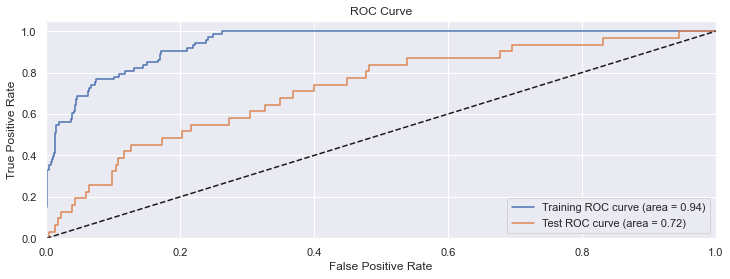

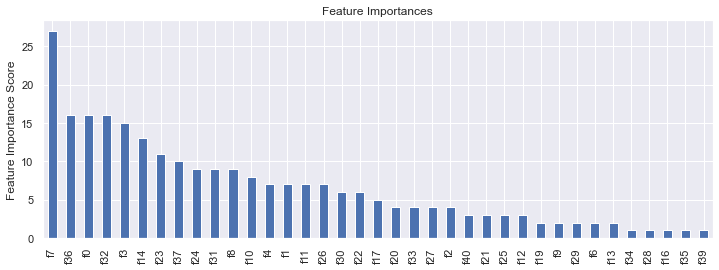

In [95]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=6,
 min_child_weight=14,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.75,
 reg_alpha=0.5,
 reg_lambda=1,   
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_model(xgb2, X_train, y_train, X_test, y_test, useTestSet = True)